In [ ]:
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [ ]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D, BatchNormalization
from keras.utils import np_utils
from keras.utils import plot_model
from keras.callbacks import TensorBoard as tb
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import tensorflow as tf
# from tensorflow.keras.callbacks import TensorBoard as tb
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
# print(tf.compat.v2.test.is_gpu_available)
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

## 1) carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/FIAP-MBA-8IA/009-Deep_Learning_Reinforcement_Learning/Exercicios/Exercicio6.2/"
LOG_PATH = "/content/drive/My Drive/FIAP-MBA-8IA/009-Deep_Learning_Reinforcement_Learning/Exercicios/Exercicio6.2/"
SAVE_MODEL = 'Ex6_2_Colab_v1.hdf'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 cnn-CIFAR10.png
 DL_Exercicio6.2_REV01.ipynb
 DL_Exercicio6.2_v01.ipynb
 DL_Exercicio6.2_v02.ipynb
 DL_Exercicio6.2_v03.ipynb
 DL_Exercicio6.2_v04.ipynb
 DL_Exercicio6.2_v05.ipynb
 DL_Exercicio6.2_v06.ipynb
 DL_Exercicio6.2_v11.ipynb
 DL_Exercicio6.2_v13.ipynb
 DL_Exercicio6.2_v14.ipynb
 DL_Exercicio6.2_v16.ipynb
 DL_Exercicio6.2_v17.ipynb
 DL_Exercicio6.2_v18.ipynb
 events.out.tfevents.1578177596.Andres-MacBook-Pro-2.local
 events.out.tfevents.1578409625.50f3b2663f7e
 Ex6_2_Colab_v1.hdf
'Exemplo CNN Dataset CIFAR10(1).py'
 modelocifar10FIAP.hdf5
 modelocifar10FIAP_v01.hdf5
'Paulo_Exemplo CNN Dataset CIFAR10_V3.ipynb'
 plugins


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


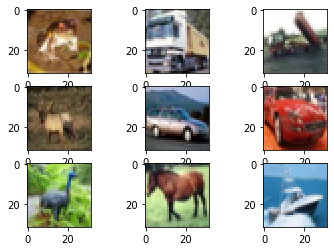

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

## 2) Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
# ### 4.  Dividindo o dataset em treinamento, teste e validação

# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(50000, 10)

## 3) divindo dataset de treinamento em treinamento, teste e validação 

#### - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [ ]:
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

In [ ]:
# impressão da forma do conjunto de treino e validação
print('x_train shape:', x_train.shape, '\n')
print('x_valid shape:', x_valid.shape, '\n')

x_train shape: (40000, 32, 32, 3) 

x_valid shape: (10000, 32, 32, 3) 



In [ ]:
# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

40000 train samples
10000 test samples
10000 validation samples


## 4)Gerando o Modelo

In [ ]:
# Acc = 77%
model = Sequential()
#input_shape sem o parametro data_format='channels_first'
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
average_pooling2d_2 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 128)         0         


## 5)Compilando o modelo

In [ ]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/
model.compile(
    loss='categorical_crossentropy'
    , optimizer='adam'
    , metrics=['accuracy']
)

## 6)Treinando o modelo

In [ ]:
batch_size = 16

In [ ]:
tensorboard = tb(
    log_dir=LOG_PATH
    ,write_graph=False #This eats a lot of space. Enable with caution!
    #,histogram_freq = 1
    ,write_images=True
    ,batch_size = batch_size
    ,write_grads=True
)

In [ ]:
earlystopper = EarlyStopping(
    monitor='loss'
    ,patience=5
    ,verbose=1
)

In [ ]:
#O keras passa a salvar o melhor modelo pela função de perda

# checkpointer = ModelCheckpoint(filepath='modelocifar10FIAP.hdf5', verbose=1,  save_best_only=True)

checkpointer = ModelCheckpoint(
    LOG_PATH + SAVE_MODEL
    , verbose = 1
    , save_best_only = True
    , monitor='accuracy'
    , mode='min'
)

In [ ]:
callbacks = [checkpointer, earlystopper, tensorboard]

In [ ]:
history = model.fit(
    x_train
    , y_train
    , epochs=50
    , validation_data=(x_valid, y_valid)
    , callbacks=[checkpointer]
    , verbose=1
    , shuffle=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/50





40000/40000 [==============================] - 13s 321us/step - loss: 1.6133 - acc: 0.4144 - val_loss: 1.3565 - val_acc: 0.5014
Epoch 2/50
40000/40000 [==============================] - 10s 255us/step - loss: 1.3222 - acc: 0.5243 - val_loss: 1.1910 - val_acc: 0.5717
Epoch 3/50
40000/40000 [==============================] - 10s 254us/step - loss: 1.1963 - acc: 0.5709 - val_loss: 1.1031 - val_acc: 0.6029
Epoch 4/50
40000/40000 [==============================] - 10s 249us/step - loss: 1.1068 - acc: 0.6054 - val_loss: 1.0440 - val_acc: 0.6263
Epoch 5/50
40000/40000 [==============================] - 10s 253us/step - loss: 1.0358 - acc: 0.6306 - val_loss: 0.9617 - val_acc: 0.6590
Epoch 6/50
40000/40000 [==============================] - 10s 254us/step - loss: 0.9763 - acc: 0.6543 - val_loss: 0.9265 - val_acc: 0.6730
Epoch 7/50
400

## 7) Saving Model

In [ ]:
model.save(LOG_PATH + SAVE_MODEL)

## 8) Carregando o modelo com a melhor precisão de validação

In [ ]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights(LOG_PATH + SAVE_MODEL)

## 9) Cálculo da precisão de classificação no dataset de testes

In [ ]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7699


## 10)Visualizar algumas predições e o modelo CNN

In [ ]:
# As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

0 8007
1 2490
2 5835
3 8428
4 2904
5 867
6 255
7 1188
8 5244
9 3764
10 2654
11 7813
12 855
13 2365
14 7631
15 9570
16 8910
17 2218
18 5748
19 3145
20 1530
21 8179
22 9314
23 6161
24 3154
25 424
26 2354
27 4702
28 9515
29 1482
30 6003
31 8278
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
average_pooling2d_2 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
__________

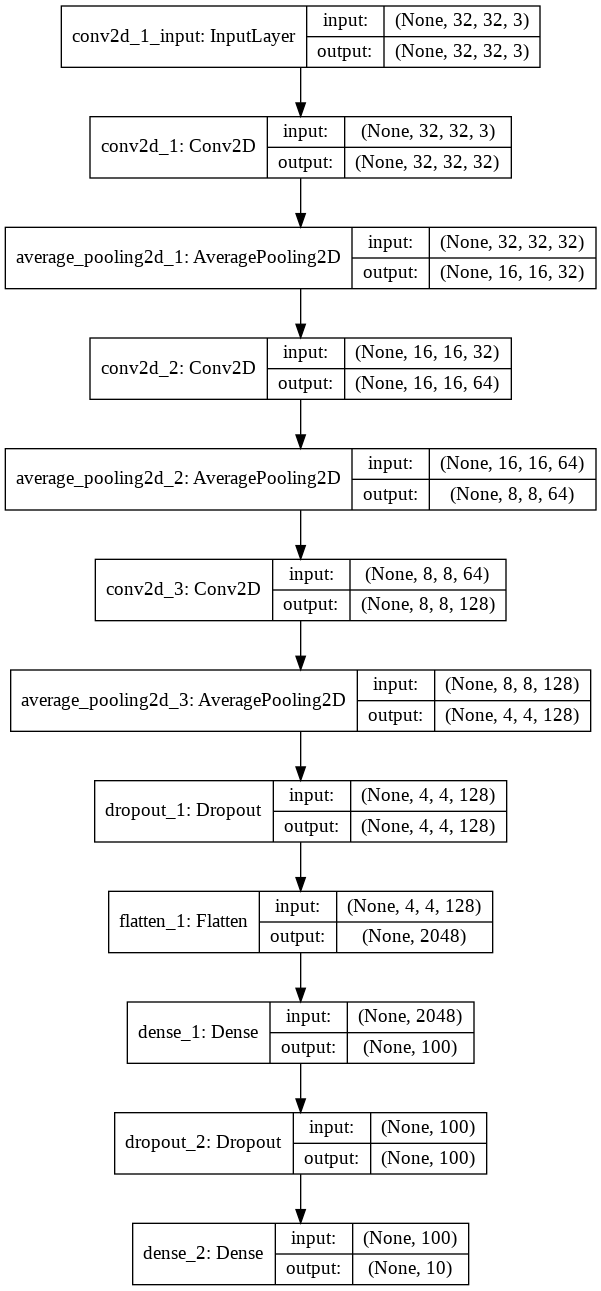

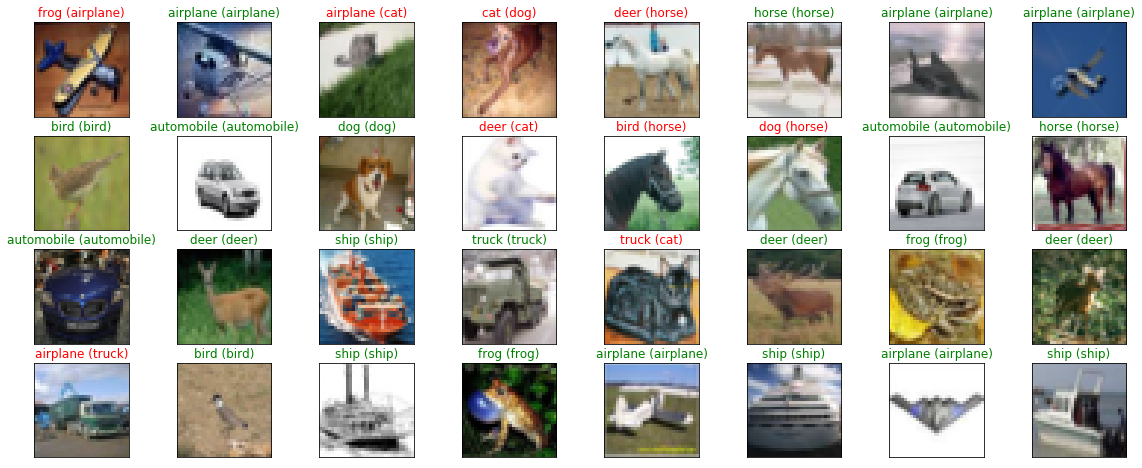

In [ ]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    print(i,idx)
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
print(model.summary())
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

## 11) Learning Curves

#### Plot Training & Validation accuracy values

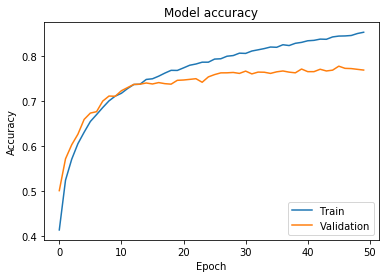

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### Plot Training & Validation losses values

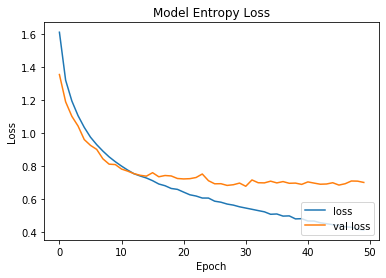

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='lower right')
plt.show()

### Notamos um overfitting no modelo que será corrigido com *Weight Regulation* e *BatchNormalization*.

#### A regularização de peso (Weight Normalization) fornece uma abordagem para reduzir o sobreajuste de um modelo de rede neural de aprendizado profundo nos dados de treinamento e melhorar o desempenho do modelo em novos dados, como o conjunto de testes de validação.

#### BatchNormalzation: Normaliza as ativações da camada anterior em cada batch, ou seja, aplique uma transformação que mantenha a ativação média próxima a 0 e o desvio padrão de ativação próximo a 1.

## 12)Corrigindo o modelo

In [ ]:
from keras.regularizers import l1,l2

In [ ]:
# model = Sequential()
# #input_shape sem o parametro data_format='channels_first'
# model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
# model.add(AveragePooling2D(pool_size=2))
# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# model.add(AveragePooling2D(pool_size=2))
# model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
# model.add(AveragePooling2D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(100, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))


model = Sequential()
#input_shape sem o parametro data_format='channels_first'
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(
    100
    , activation='tanh'
    , kernel_regularizer=l1(0.001)
))

# model.add(Dropout(0.1))

model.add(Dense(
    50
    , activation='tanh'
    # , kernel_regularizer=l1(0.01)
))

model.add(Dropout(0.3))

model.add(Dense(
    num_classes
    , activation='softmax'
    # , kernel_regularizer=l1(0.001)
))

## 13) Compilando o modelo

In [ ]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/
model.compile(
    loss='categorical_crossentropy'
    , optimizer='adam'
    , metrics=['accuracy']
)

## 14) Treinando o modelo

In [ ]:
batch_size = 32

In [ ]:
log_path = LOG_PATH

In [ ]:
tensorboard = tb(
    log_dir=LOG_PATH
    ,write_graph=False #This eats a lot of space. Enable with caution!
    #,histogram_freq = 1
    ,write_images=True
    ,batch_size = batch_size
    ,write_grads=True
)

In [ ]:
earlystopper = EarlyStopping(
    monitor='loss'
    ,patience=15
    ,verbose=1
)

In [ ]:
#O keras passa a salvar o melhor modelo pela função de perda

# checkpointer = ModelCheckpoint(filepath='modelocifar10FIAP.hdf5', verbose=1,  save_best_only=True)

checkpointer = ModelCheckpoint(
    LOG_PATH + SAVE_MODEL
    , verbose = 1
    , save_best_only = True
    , monitor='accuracy'
    , mode='min'
)

In [ ]:
callbacks = [checkpointer, earlystopper, tensorboard]

## 15) Treinando o Modelo

In [ ]:
history = model.fit(
    x_train
    , y_train
    , epochs=250
    , validation_data=(x_valid, y_valid)
    , callbacks=callbacks
    , verbose=1
    , shuffle=True
)

Train on 40000 samples, validate on 10000 samples


Epoch 1/250
40000/40000 [==============================] - 13s 314us/step - loss: 2.5073 - acc: 0.3952 - val_loss: 1.8836 - val_acc: 0.4654

Epoch 2/250
40000/40000 [==============================] - 12s 303us/step - loss: 1.7837 - acc: 0.4910 - val_loss: 1.6198 - val_acc: 0.5400
Epoch 3/250
40000/40000 [==============================] - 12s 303us/step - loss: 1.6376 - acc: 0.5419 - val_loss: 1.6035 - val_acc: 0.5518
Epoch 4/250
40000/40000 [==============================] - 12s 305us/step - loss: 1.5453 - acc: 0.5753 - val_loss: 1.5049 - val_acc: 0.5904
Epoch 5/250
40000/40000 [==============================] - 12s 305us/step - loss: 1.4925 - acc: 0.5953 - val_loss: 1.3138 - val_acc: 0.6597
Epoch 6/250
40000/40000 [==============================] - 12s 303us/step - loss: 1.4405 - acc: 0.6132 - val_loss: 1.4057 - val_acc: 0.6073
Epoch 7/250
40000/40000 [==============================] - 12s 308us/step - loss: 1.4044 - acc: 0.6256 - va

In [ ]:
model.save(LOG_PATH + SAVE_MODEL)

## 16) Carregando o modelo com a melhor precisão de validação

In [ ]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights(LOG_PATH + SAVE_MODEL)

## 17) Cálculo da precisão de classificação no dataset de testes

In [ ]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7797


## 18) Visualizar algumas predições e novo modelo da CNN

In [ ]:
# As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

0 3962
1 9800
2 8753
3 194
4 3249
5 2666
6 3903
7 3361
8 2509
9 2625
10 1288
11 1070
12 920
13 3422
14 5713
15 4571
16 8299
17 1960
18 8492
19 1158
20 390
21 6055
22 6002
23 3540
24 4245
25 5552
26 7181
27 9203
28 3921
29 7535
30 2423
31 6304
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
average_pooling2d_4 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
average_pooling2d_5 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________

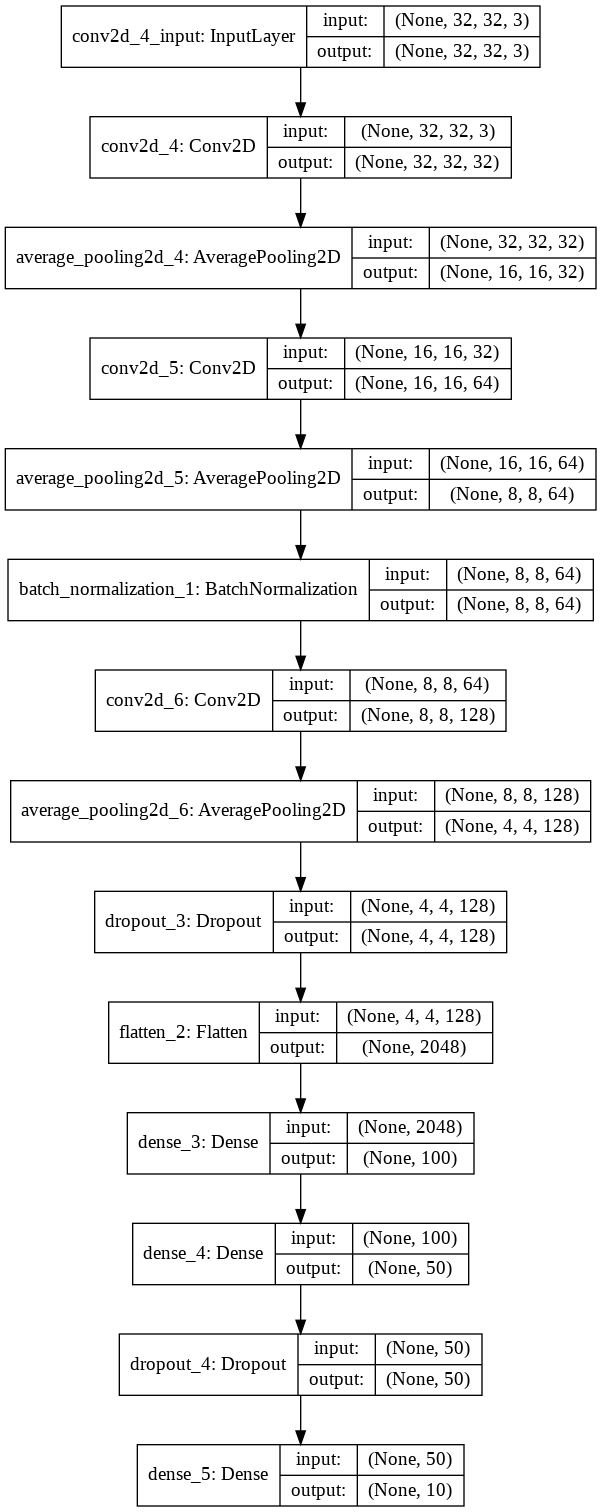

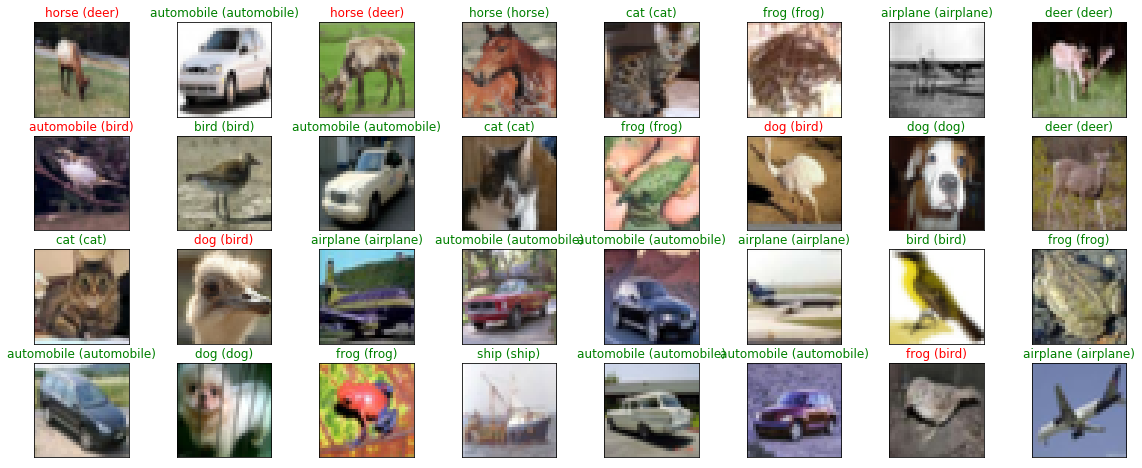

In [ ]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    print(i,idx)
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
print(model.summary())
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

## 19) Learning Curves


#### Plot Training & Validation accuracy values

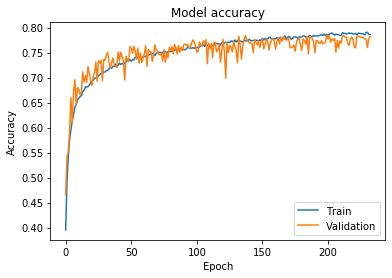

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### Plot Training & Validation losses values

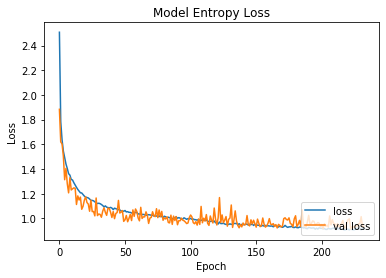

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val loss'], loc='lower right')
plt.show()

#### Nota-se que o problema de overfitting foi corrigido após aplicarmos weigh regulation e batchnormalization. Obtivemos 77.97% de acurácia.

#### References:

https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

https://keras.io/layers/normalization/